In [3]:
import os
import numpy as np

# Paths to the combined images and labels
combined_images_path = './combined_images'
labels_path = './labels'

# Function to load combined images and labels
def load_combined_data(record_list):
    combined_images = []
    labels = []
    for record_name in record_list:
        combined_images_file = os.path.join(combined_images_path, f'{record_name}_combined_images.npy')
        labels_file = os.path.join(labels_path, f'{record_name}_labels.npy')
        
        combined_images_record = np.load(combined_images_file)
        labels_record = np.load(labels_file)
        
        combined_images.append(combined_images_record)
        labels.append(labels_record)
    
    # Concatenate all records into a single array
    combined_images = np.concatenate(combined_images, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return combined_images, labels

# List of records to process
record_list = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
               '111', '112', '113', '114', '115', '116', '117', '118', '119', '121',
               '122', '123', '124', '200', '201', '202', '203', '205', '207', '208',
               '209', '210', '212', '213', '214', '215', '217', '219', '220', '221',
               '222', '223', '228', '230', '231', '232', '233', '234']

# Load the data
images, labels = load_combined_data(record_list)

# Check the shapes of the loaded data
print(f'Combined images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')


Combined images shape: (112550, 128, 128, 3)
Labels shape: (112550,)


In [3]:
import os
import numpy as np
import wfdb
from collections import Counter

# Define paths
data_path = '/home/researchgroup/mahjabeen_workspace/research/CLINet-ECG-Classification-2024/data/mit-bih/mitbih_database/' # Update this path to your data location

# List of records to process, excluding those with pacemakers
record_list = ['100', '101', '103', '105', '106', '108', '109', '111', '112', '113', 
               '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', 
               '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', 
               '213', '214', '215', '219', '220', '221', '222', '223', '228', '230', 
               '231', '232', '233', '234']  # Excluding 102, 104, 107, 217

# Define the AAMI class mapping
aami_mapping = {
    'N': 'Normal',
    'L': 'Normal',
    'R': 'Normal',
    'e': 'Normal',
    'j': 'Normal',
    'A': 'SVEB',
    'a': 'SVEB',
    'J': 'SVEB',
    'S': 'SVEB',
    'V': 'VEB',
    'E': 'VEB',
    'F': 'Fusion',
    '/': 'Unknown',
    'f': 'Unknown',
    'Q': 'Unknown'
}

# Function to count labels in each record
def count_labels_in_record(record_name):
    try:
        annotation = wfdb.rdann(os.path.join(data_path, record_name), 'atr')
        labels = annotation.symbol  # Annotation symbols (labels)
        aami_labels = [aami_mapping.get(label, 'Unknown') for label in labels]
        return Counter(aami_labels)
    except Exception as e:
        print(f'Error processing record {record_name}: {e}')
        return None

# Process each record and display the counts
total_labels = Counter()
for record_name in record_list:
    print(f'Processing record: {record_name}')
    label_counts = count_labels_in_record(record_name)
    if label_counts:
        print(f'Label counts for record {record_name}: {label_counts}')
        total_labels.update(label_counts)

print(f'Total label counts after exclusion: {total_labels}')


Processing record: 100
Label counts for record 100: Counter({'Normal': 2239, 'SVEB': 33, 'Unknown': 1, 'VEB': 1})
Processing record: 101
Label counts for record 101: Counter({'Normal': 1860, 'Unknown': 11, 'SVEB': 3})
Processing record: 103
Label counts for record 103: Counter({'Normal': 2082, 'Unknown': 7, 'SVEB': 2})
Processing record: 105
Label counts for record 105: Counter({'Normal': 2526, 'Unknown': 124, 'VEB': 41})
Processing record: 106
Label counts for record 106: Counter({'Normal': 1507, 'VEB': 520, 'Unknown': 71})
Processing record: 108
Label counts for record 108: Counter({'Normal': 1740, 'Unknown': 61, 'VEB': 17, 'SVEB': 4, 'Fusion': 2})
Processing record: 109
Label counts for record 109: Counter({'Normal': 2492, 'VEB': 38, 'Unknown': 3, 'Fusion': 2})
Processing record: 111
Label counts for record 111: Counter({'Normal': 2123, 'Unknown': 9, 'VEB': 1})
Processing record: 112
Label counts for record 112: Counter({'Normal': 2537, 'Unknown': 11, 'SVEB': 2})
Processing record: 

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
import os
import numpy as np

# Define the directories containing the .npy files
combined_images_dir = './combined_images'
labels_dir = './labels'

# Initialize lists to store the loaded data
all_combined_images = []
all_labels = []

# Load combined images from each .npy file in the directory
for filename in os.listdir(combined_images_dir):
    if filename.endswith('.npy'):
        file_path = os.path.join(combined_images_dir, filename)
        images = np.load(file_path)
        all_combined_images.append(images)
        print(f'Loaded {filename} with shape: {images.shape}')

# Load labels from each .npy file in the directory
for filename in os.listdir(labels_dir):
    if filename.endswith('.npy'):
        file_path = os.path.join(labels_dir, filename)
        labels = np.load(file_path)
        all_labels.append(labels)
        print(f'Loaded {filename} with shape: {labels.shape}')

# Concatenate all images and labels into single arrays
combined_images = np.concatenate(all_combined_images, axis=0)
labels = np.concatenate(all_labels, axis=0)

print(f'Combined images shape: {combined_images.shape}')
print(f'Labels shape: {labels.shape}')

Loaded 217_combined_images.npy with shape: (2279, 128, 128, 3)
Loaded 122_combined_images.npy with shape: (2476, 128, 128, 3)
Loaded 107_combined_images.npy with shape: (2138, 128, 128, 3)
Loaded 105_combined_images.npy with shape: (2690, 128, 128, 3)
Loaded 106_combined_images.npy with shape: (2097, 128, 128, 3)
Loaded 101_combined_images.npy with shape: (1872, 128, 128, 3)
Loaded 212_combined_images.npy with shape: (2761, 128, 128, 3)
Loaded 220_combined_images.npy with shape: (2066, 128, 128, 3)
Loaded 116_combined_images.npy with shape: (2420, 128, 128, 3)
Loaded 208_combined_images.npy with shape: (3037, 128, 128, 3)
Loaded 108_combined_images.npy with shape: (1822, 128, 128, 3)
Loaded 200_combined_images.npy with shape: (2790, 128, 128, 3)
Loaded 210_combined_images.npy with shape: (2682, 128, 128, 3)
Loaded 223_combined_images.npy with shape: (2641, 128, 128, 3)
Loaded 115_combined_images.npy with shape: (1960, 128, 128, 3)
Loaded 234_combined_images.npy with shape: (2762, 128, 

In [1]:
#combing images and lables in a hdf5 file
import os
import numpy as np
import h5py
import re

# Define the directories containing the .npy files
combined_images_dir = './combined_images'
labels_dir = './labels'
output_hdf5_path = 'combined_data.h5'

# Function to extract record number from filename
def extract_record_number(filename):
    match = re.match(r'(\d+)_combined_images.npy', filename)
    if match:
        return int(match.group(1))
    return None

# Get the list of combined image files and sort by record number
combined_image_files = sorted([f for f in os.listdir(combined_images_dir) if f.endswith('_combined_images.npy')],
                              key=extract_record_number)

# Initialize lists to store the loaded data
all_combined_images = []
all_labels = []

# Load combined images and corresponding labels from each .npy file
for image_filename in combined_image_files:
    record_number = extract_record_number(image_filename)
    if record_number is None:
        print(f'Could not extract record number from filename: {image_filename}')
        continue

    images_path = os.path.join(combined_images_dir, image_filename)
    label_filename = f'{record_number}_labels.npy'
    labels_path = os.path.join(labels_dir, label_filename)

    if not os.path.exists(labels_path):
        print(f'Labels file for {record_number} not found.')
        continue
    
    images = np.load(images_path)
    labels = np.load(labels_path)
    
    all_combined_images.append(images)
    all_labels.append(labels)
    print(f'Loaded {image_filename} with image shape: {images.shape} and label shape: {labels.shape}')

# Concatenate all images and labels into single arrays
combined_images = np.concatenate(all_combined_images, axis=0)
labels = np.concatenate(all_labels, axis=0)

print(f'Final combined images shape: {combined_images.shape}')
print(f'Final labels shape: {labels.shape}')

# Create an HDF5 file and store the data
with h5py.File(output_hdf5_path, 'w') as hdf5_file:
    hdf5_file.create_dataset('images', data=combined_images, compression="gzip", chunks=True)
    hdf5_file.create_dataset('labels', data=labels, compression="gzip", chunks=True)

print(f'Data successfully saved to {output_hdf5_path}')



Loaded 100_combined_images.npy with image shape: (2271, 128, 128, 3) and label shape: (2271,)
Loaded 101_combined_images.npy with image shape: (1872, 128, 128, 3) and label shape: (1872,)
Loaded 102_combined_images.npy with image shape: (2189, 128, 128, 3) and label shape: (2189,)
Loaded 103_combined_images.npy with image shape: (2089, 128, 128, 3) and label shape: (2089,)
Loaded 104_combined_images.npy with image shape: (2308, 128, 128, 3) and label shape: (2308,)
Loaded 105_combined_images.npy with image shape: (2690, 128, 128, 3) and label shape: (2690,)
Loaded 106_combined_images.npy with image shape: (2097, 128, 128, 3) and label shape: (2097,)
Loaded 107_combined_images.npy with image shape: (2138, 128, 128, 3) and label shape: (2138,)
Loaded 108_combined_images.npy with image shape: (1822, 128, 128, 3) and label shape: (1822,)
Loaded 109_combined_images.npy with image shape: (2532, 128, 128, 3) and label shape: (2532,)
Loaded 111_combined_images.npy with image shape: (2132, 128,

: 

In [1]:
# #Trying with smaller dataset
# import os
# import numpy as np
# import h5py

# # Define directories
# combined_images_dir = './combined_images'
# labels_dir = './labels'
# output_hdf5_path = 'subset_dataset.h5'

# # List of the first five records (assuming filenames follow a pattern)
# record_numbers = ['100', '101', '102', '103', '104']

# # Initialize lists to store data
# all_combined_images = []
# all_labels = []

# # Load the first five records
# for record_number in record_numbers:
#     images_filename = f'{record_number}_combined_images.npy'
#     labels_filename = f'{record_number}_labels.npy'
    
#     images_path = os.path.join(combined_images_dir, images_filename)
#     labels_path = os.path.join(labels_dir, labels_filename)
    
#     if not os.path.exists(labels_path):
#         print(f'Labels file for {images_filename} not found.')
#         continue
    
#     images = np.load(images_path)
#     labels = np.load(labels_path)
    
#     print(f'Loaded {images_filename} with image shape: {images.shape} and label shape: {labels.shape}')
    
#     all_combined_images.append(images)
#     all_labels.append(labels)

# # Check if any data was loaded
# if not all_combined_images or not all_labels:
#     raise ValueError("No data was loaded. Please check the filenames and paths.")

# # Concatenate all data into single arrays
# combined_images = np.concatenate(all_combined_images, axis=0)
# labels = np.concatenate(all_labels, axis=0)

# # Save to HDF5 file
# with h5py.File(output_hdf5_path, 'w') as hdf5_file:
#     hdf5_file.create_dataset('images', data=combined_images, compression='gzip')
#     hdf5_file.create_dataset('labels', data=labels, compression='gzip')

# print(f'Data successfully saved to {output_hdf5_path}')
# print(f'Combined images shape: {combined_images.shape}')
# print(f'Labels shape: {labels.shape}')


Loaded 100_combined_images.npy with image shape: (2271, 128, 128, 3) and label shape: (2271,)
Loaded 101_combined_images.npy with image shape: (1872, 128, 128, 3) and label shape: (1872,)
Loaded 102_combined_images.npy with image shape: (2189, 128, 128, 3) and label shape: (2189,)
Loaded 103_combined_images.npy with image shape: (2089, 128, 128, 3) and label shape: (2089,)
Loaded 104_combined_images.npy with image shape: (2308, 128, 128, 3) and label shape: (2308,)


TypeError: No conversion path for dtype: dtype('<U7')

In [2]:
#debugging
import os
import numpy as np
import h5py

# Define directories
combined_images_dir = './combined_images'
labels_dir = './labels'
output_hdf5_path = 'subset_dataset.h5'

# List of the first five records (assuming filenames follow a pattern)
record_numbers = ['100', '101', '102', '103', '104']

# Initialize lists to store data
all_combined_images = []
all_labels = []

# Initialize a mapping dictionary for labels
label_mapping = {}

# Convert labels to integers
def convert_labels_to_int(labels):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label not in label_mapping:
            label_mapping[label] = len(label_mapping)
    return np.array([label_mapping[label] for label in labels])

# Load the first five records
for record_number in record_numbers:
    images_filename = f'{record_number}_combined_images.npy'
    labels_filename = f'{record_number}_labels.npy'
    
    images_path = os.path.join(combined_images_dir, images_filename)
    labels_path = os.path.join(labels_dir, labels_filename)
    
    if not os.path.exists(labels_path):
        print(f'Labels file for {images_filename} not found.')
        continue
    
    images = np.load(images_path)
    labels = np.load(labels_path)
    labels_int = convert_labels_to_int(labels)  # Convert labels to integers
    
    print(f'Loaded {images_filename} with image shape: {images.shape} and label shape: {labels_int.shape}')
    
    all_combined_images.append(images)
    all_labels.append(labels_int)

# Check if any data was loaded
if not all_combined_images or not all_labels:
    raise ValueError("No data was loaded. Please check the filenames and paths.")

# Concatenate all data into single arrays
combined_images = np.concatenate(all_combined_images, axis=0)
labels = np.concatenate(all_labels, axis=0)

# Save to HDF5 file
with h5py.File(output_hdf5_path, 'w') as hdf5_file:
    hdf5_file.create_dataset('images', data=combined_images, compression='gzip')
    hdf5_file.create_dataset('labels', data=labels, compression='gzip')
    # Save the label mapping
    dt = h5py.special_dtype(vlen=str)
    label_mapping_dataset = hdf5_file.create_dataset('label_mapping', (len(label_mapping),), dtype=dt)
    for label, idx in label_mapping.items():
        label_mapping_dataset[idx] = label

print(f'Data successfully saved to {output_hdf5_path}')
print(f'Combined images shape: {combined_images.shape}')
print(f'Labels shape: {labels.shape}')
print(f'Label mapping: {label_mapping}')


Loaded 100_combined_images.npy with image shape: (2271, 128, 128, 3) and label shape: (2271,)
Loaded 101_combined_images.npy with image shape: (1872, 128, 128, 3) and label shape: (1872,)
Loaded 102_combined_images.npy with image shape: (2189, 128, 128, 3) and label shape: (2189,)
Loaded 103_combined_images.npy with image shape: (2089, 128, 128, 3) and label shape: (2089,)
Loaded 104_combined_images.npy with image shape: (2308, 128, 128, 3) and label shape: (2308,)
Data successfully saved to subset_dataset.h5
Combined images shape: (10729, 128, 128, 3)
Labels shape: (10729,)
Label mapping: {'Normal': 0, 'SVEB': 1, 'VEB': 2, 'Unknown': 3}


In [4]:
#Inspecting the File Structure
import h5py

# Open the HDF5 file
with h5py.File('subset_dataset.h5', 'r') as hdf5_file:
    print("Keys: %s" % hdf5_file.keys())
    # Inspect datasets
    for key in hdf5_file.keys():
        print(f'{key}: {hdf5_file[key].shape}')


Keys: <KeysViewHDF5 ['images', 'label_mapping', 'labels']>
images: (10729, 128, 128, 3)
label_mapping: (4,)
labels: (10729,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


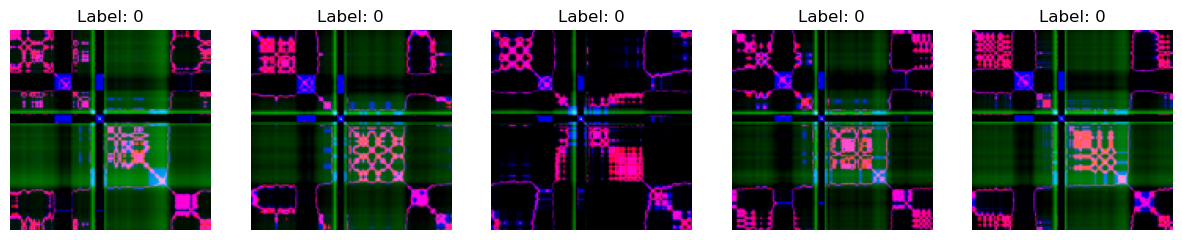

In [5]:
#Visualizing a Sample of Images and Labels
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file and load the data
with h5py.File('subset_dataset.h5', 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]
    label_mapping = hdf5_file['label_mapping'][:]

# Define the number of samples to visualize
num_samples = 5

# Plot a few samples
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

IndexError: list index out of range

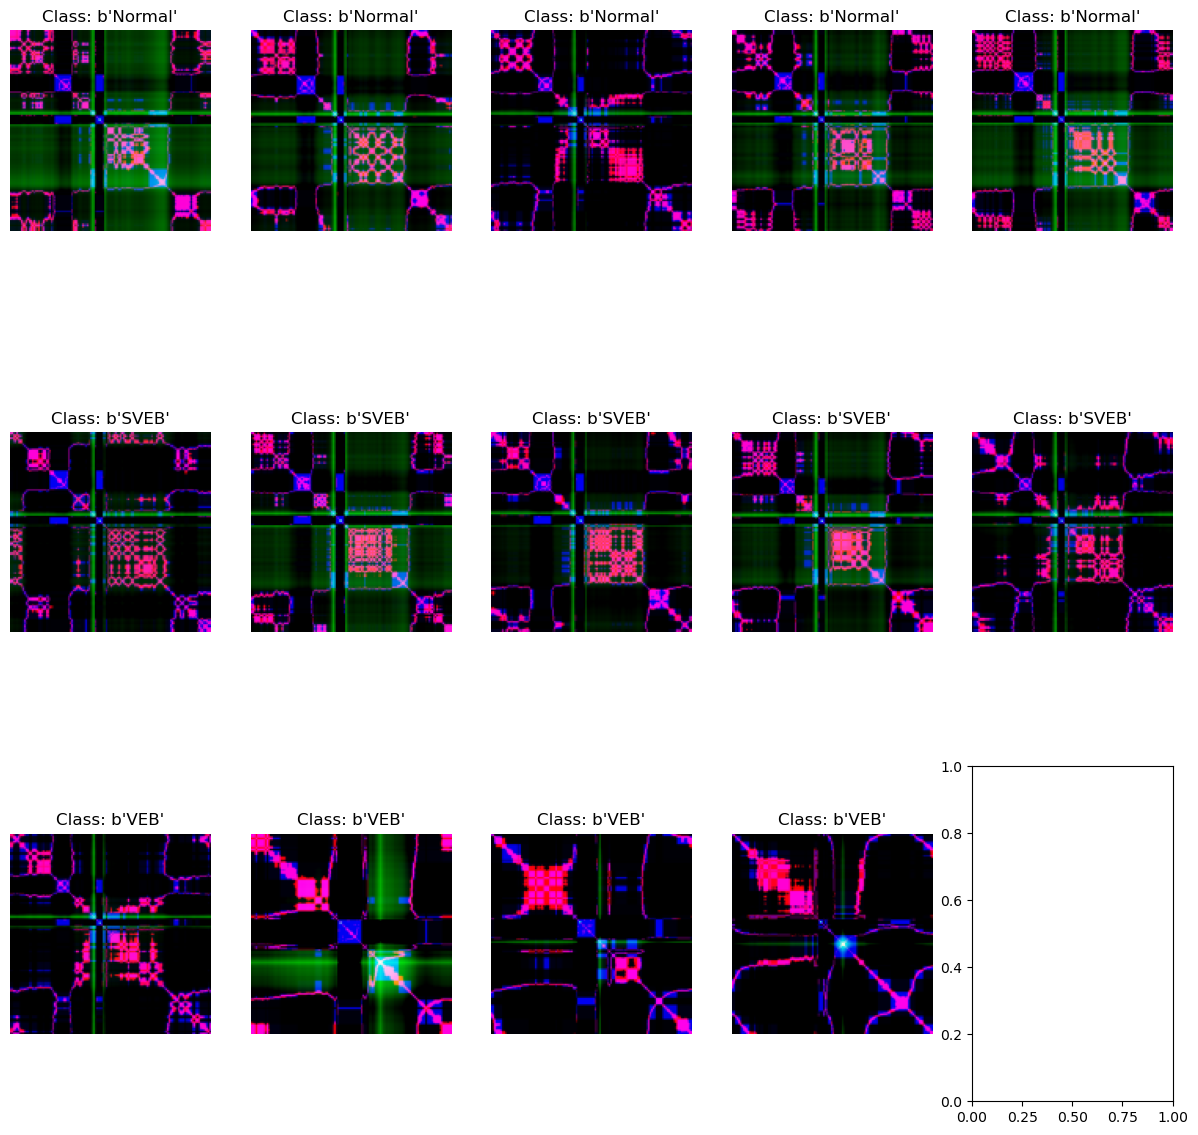

In [6]:
# Visualize samples from different classes
unique_labels = np.unique(labels)
num_samples = 5  # Number of samples per class to visualize

plt.figure(figsize=(15, 5 * len(unique_labels)))
for label_index, label in enumerate(unique_labels):
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    for i in range(num_samples):
        plt.subplot(len(unique_labels), num_samples, label_index * num_samples + i + 1)
        plt.imshow(images[indices[i]])
        plt.title(f'Class: {label_mapping[label]}')
        plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

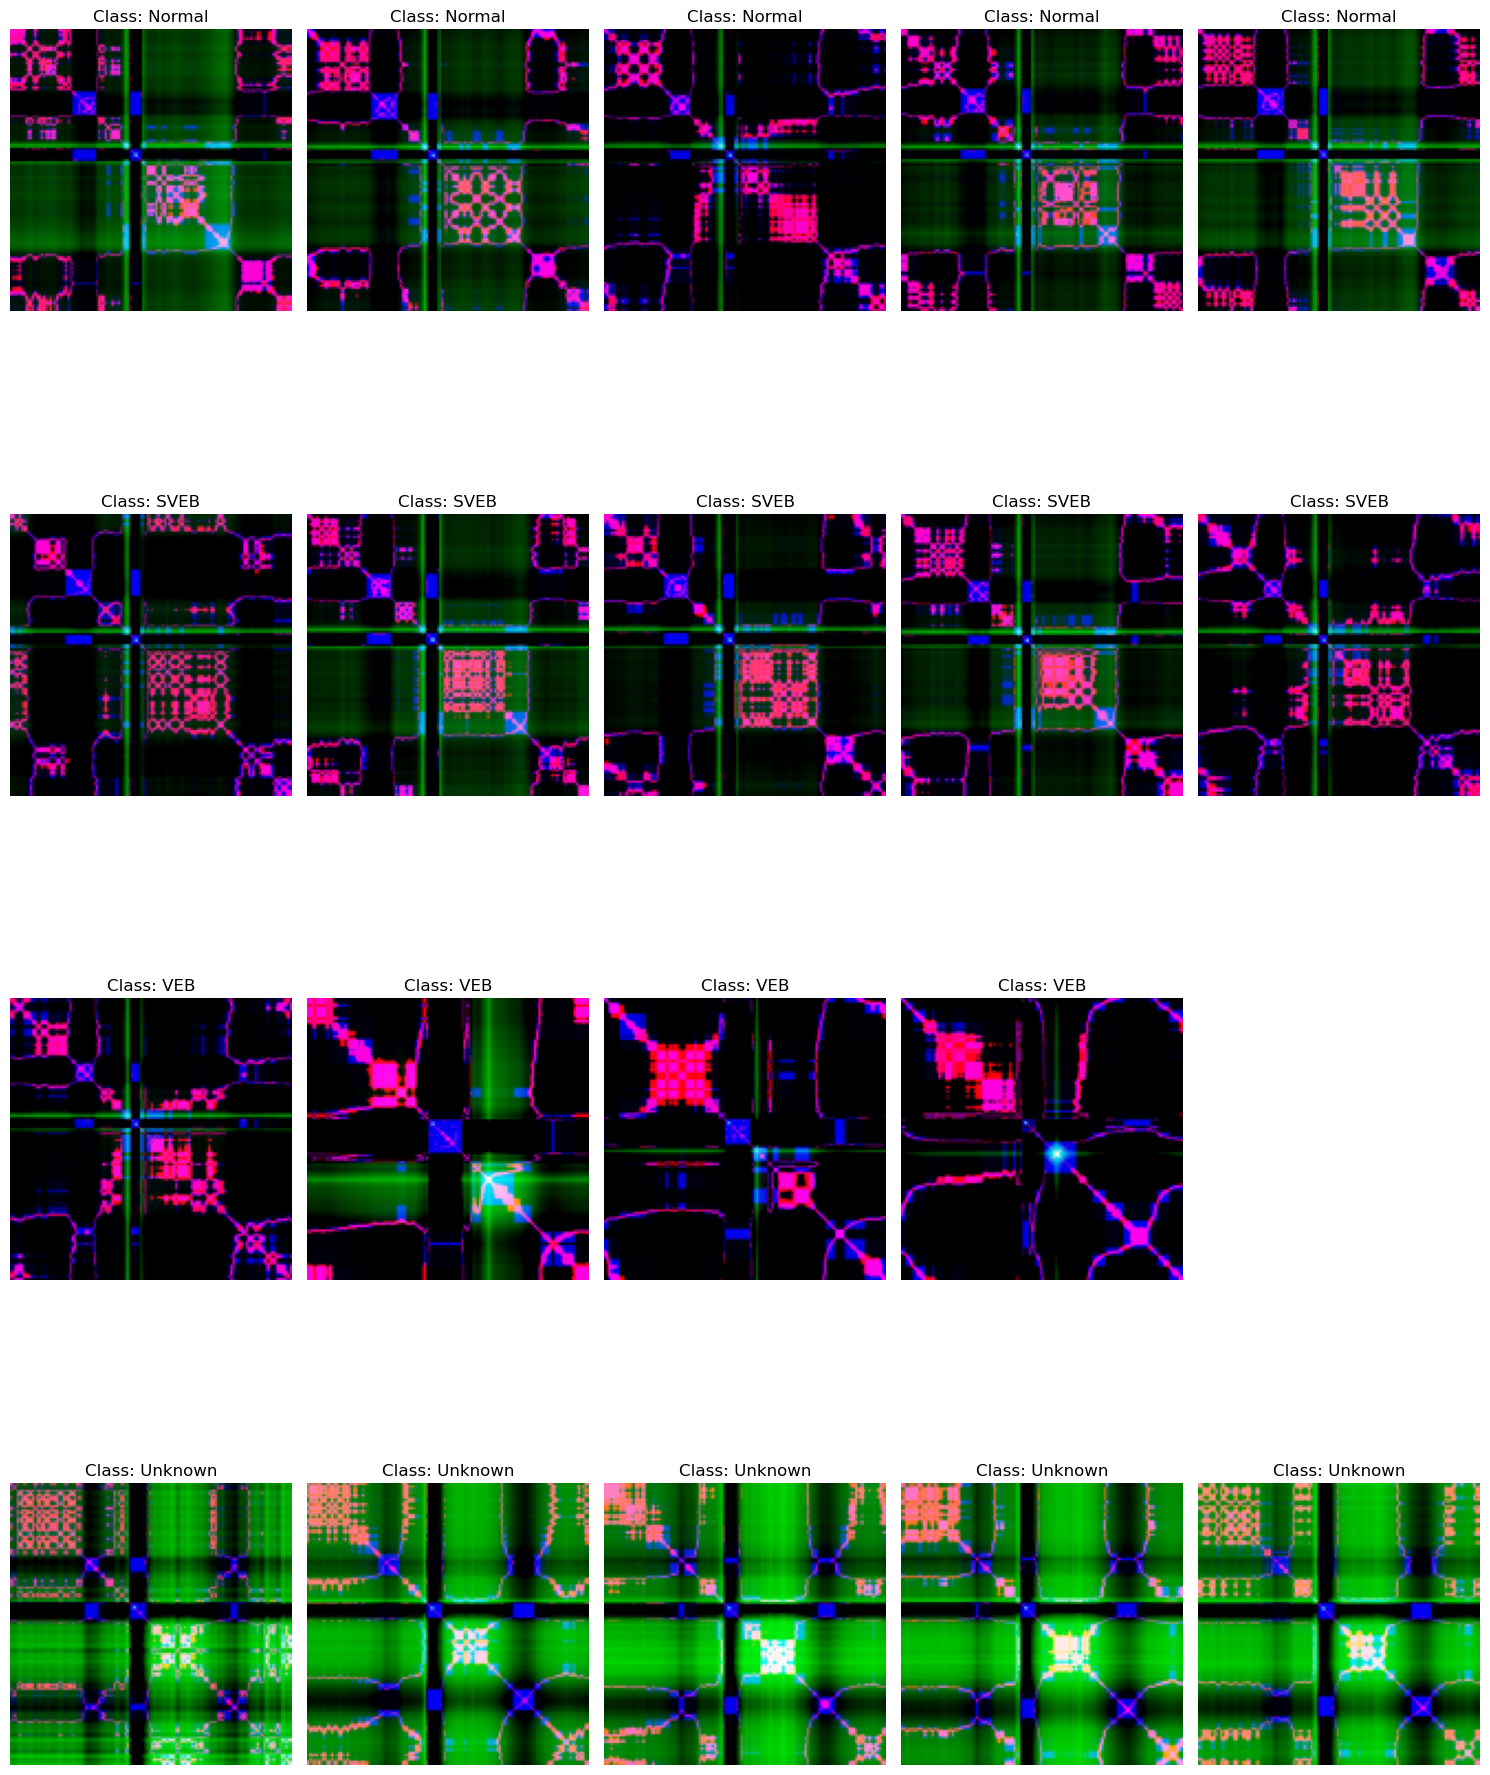

In [7]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Path to the HDF5 file
hdf5_file_path = 'subset_dataset.h5'

# Load the data
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]
    label_mapping = {0: 'Normal', 1: 'SVEB', 2: 'VEB', 3: 'Unknown'}  # Example mapping

# Visualize a few samples from each class
unique_labels = np.unique(labels)
num_samples_per_class = 5  # Adjust as necessary

plt.figure(figsize=(15, 5 * len(unique_labels)))
for class_idx, label in enumerate(unique_labels):
    class_indices = np.where(labels == label)[0]
    actual_samples = min(num_samples_per_class, len(class_indices))  # Ensure we don't exceed available samples
    for i in range(actual_samples):
        plt.subplot(len(unique_labels), num_samples_per_class, class_idx * num_samples_per_class + i + 1)
        plt.imshow(images[class_indices[i]], vmin=0, vmax=255)  # Adjust value range for proper display
        plt.title(f'Class: {label_mapping[label]}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# #Training and Evaluation with the subset
# import h5py
# import numpy as np
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import matplotlib.pyplot as plt

# # Path to the HDF5 file
# hdf5_file_path = 'subset_dataset.h5'

# # Load the data
# with h5py.File(hdf5_file_path, 'r') as hdf5_file:
#     images = hdf5_file['images'][:]
#     labels = hdf5_file['labels'][:]

# # Split the data into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# print(f'Training data shape: {X_train.shape}, {y_train.shape}')
# print(f'Validation data shape: {X_val.shape}, {y_val.shape}')
# print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

# # Define early stopping and model checkpoint callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping, model_checkpoint]
# )

# # Load the best model
# model.load_weights('best_model.h5')

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test loss: {test_loss:.4f}')
# print(f'Test accuracy: {test_accuracy:.4f}')

# # Plot training and validation accuracy and loss
# plt.figure(figsize=(12, 4))

# # Accuracy plot
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train')
# plt.plot(history.history['val_accuracy'], label='Validation')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # Loss plot
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train')
# plt.plot(history.history['val_loss'], label='Validation')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()


2024-06-20 16:22:03.404997: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 16:22:03.573332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 16:22:03.573391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 16:22:03.602832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 16:22:03.642562: I tensorflow/core/platform/cpu_feature_guar

Training data shape: (7724, 128, 128, 3), (7724,)
Validation data shape: (859, 128, 128, 3), (859,)
Testing data shape: (2146, 128, 128, 3), (2146,)


NameError: name 'model' is not defined

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Reshape, Multiply

# Define the FCA block
def FCA_block(inputs, reduction_ratio=16):
    channel_axis = -1
    channels = inputs.shape[channel_axis]
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    outputs = Multiply()([inputs, x])
    return outputs

# Define a residual block with FCA
def residual_block(inputs, filters, kernel_size=3, strides=1, use_fca=True):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    if use_fca:
        x = FCA_block(x)
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    if strides != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
    else:
        shortcut = inputs
    x = Add()([x, shortcut])
    return x

# Reduced complexity model
def build_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv2D(16, (7, 7), strides=2, padding='same')(inputs)  # Further reduced filters
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = residual_block(x, 16)  # Further reduced filters
    x = residual_block(x, 16)  # Further reduced filters
    x = residual_block(x, 32, strides=2)  # Further reduced filters
    x = residual_block(x, 32)  # Further reduced filters
    x = residual_block(x, 64, strides=2)  # Further reduced filters
    x = residual_block(x, 64)  # Further reduced filters
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)  # Reduced dense layer size
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)  # Reduced dense layer size
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Build and compile the model
input_shape = (128, 128, 3)
num_classes = 5
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
# # Define the full model with reduced complexity
# def build_model(input_shape=(128, 128, 3), num_classes=5):
#     inputs = Input(shape=input_shape)
#     x = Conv2D(32, (7, 7), strides=2, padding='same')(inputs)  # Reduced number of filters
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = BatchNormalization()(x)
#     x = residual_block(x, 32)  # Reduced number of filters
#     x = residual_block(x, 32)  # Reduced number of filters
#     x = residual_block(x, 64, strides=2)  # Reduced number of filters
#     x = residual_block(x, 64)  # Reduced number of filters
#     x = residual_block(x, 128, strides=2)  # Reduced number of filters
#     x = residual_block(x, 128)  # Reduced number of filters
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)  # Reduced number of units
#     x = Dropout(0.5)(x)
#     x = Dense(32, activation='relu')(x)  # Reduced number of units
#     x = Dropout(0.5)(x)
#     outputs = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs, outputs)
#     return model

# # Build and compile the model
# input_shape = (128, 128, 3)
# num_classes = 5
# model = build_model(input_shape, num_classes)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()


2024-06-20 17:00:20.652284: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 17:00:20.684328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 17:00:20.684357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 17:00:20.685080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 17:00:20.690226: I tensorflow/core/platform/cpu_feature_guar

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 16)           2368      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['max_pooling2d[0][0]']   

In [3]:
#training with the subset
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Path to the HDF5 file
hdf5_file_path = 'subset_dataset.h5'

# Load the data
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, {y_val.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with a smaller batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=8,  # Further reduced batch size
    callbacks=[early_stopping, model_checkpoint]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Training data shape: (7724, 128, 128, 3), (7724,)
Validation data shape: (859, 128, 128, 3), (859,)
Testing data shape: (2146, 128, 128, 3), (2146,)


2024-06-20 17:02:05.334241: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.41GiB (rounded to 1518600192)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-06-20 17:02:05.334295: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-06-20 17:02:05.334317: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 124, Chunks in use: 124. 31.0KiB allocated for chunks. 31.0KiB in use in bin. 11.9KiB client-requested in use in bin.
2024-06-20 17:02:05.334330: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 3, Chunks in use: 2. 2.0KiB allocated for chunks. 1.2KiB in use in bin. 1.1KiB client-requested in use in bin.
2024-06-20 17:02:05.

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [1]:
#again modifying the model because of the memory issue that I am facing
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Reshape, Multiply

# Define the FCA block
def FCA_block(inputs, reduction_ratio=16):
    channel_axis = -1
    channels = inputs.shape[channel_axis]
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    outputs = Multiply()([inputs, x])
    return outputs

# Define a residual block with FCA
def residual_block(inputs, filters, kernel_size=3, strides=1, use_fca=True):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    if use_fca:
        x = FCA_block(x)
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    if strides != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
    else:
        shortcut = inputs
    x = Add()([x, shortcut])
    return x

# Define the full model
def build_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv2D(16, (7, 7), strides=2, padding='same')(inputs)  # Reduced filters
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = residual_block(x, 16)
    x = residual_block(x, 16)
    x = residual_block(x, 32, strides=2)
    x = residual_block(x, 32)
    x = residual_block(x, 64, strides=2)
    x = residual_block(x, 64)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)  # Reduced dense layer size
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)  # Reduced dense layer size
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Build and compile the model
input_shape = (128, 128, 3)
num_classes = 5
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


2024-06-21 14:20:51.447022: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-21 14:20:51.476050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 14:20:51.476072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 14:20:51.476728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 14:20:51.481388: I tensorflow/core/platform/cpu_feature_guar

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 16)           2368      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['max_pooling2d[0][0]']   

Training data shape: (7724, 128, 128, 3), (7724,)
Validation data shape: (859, 128, 128, 3), (859,)
Testing data shape: (2146, 128, 128, 3), (2146,)
Epoch 1/10


2024-06-21 14:21:21.404869: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-06-21 14:21:23.343900: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f013e68d180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-21 14:21:23.343952: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-06-21 14:21:23.343964: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-06-21 14:21:23.370055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719004883.541553   74908 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3862/3862 [==============================] - 113s 26ms/step - loss: 0.2492 - accuracy: 0.9439 - val_loss: 0.1530 - val_accuracy: 0.9767
Epoch 2/10
   1/3862 [..............................] - ETA: 1:33 - loss: 2.7977e-04 - accuracy: 1.0000

/home/researchgroup/miniconda3/envs/newtest/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3862/3862 [==============================] - 100s 26ms/step - loss: 0.1725 - accuracy: 0.9650 - val_loss: 0.0903 - val_accuracy: 0.9756
Epoch 3/10
3862/3862 [==============================] - 100s 26ms/step - loss: 0.1537 - accuracy: 0.9696 - val_loss: 0.0894 - val_accuracy: 0.9767
Epoch 4/10
3862/3862 [==============================] - 99s 26ms/step - loss: 0.1368 - accuracy: 0.9709 - val_loss: 0.1339 - val_accuracy: 0.9779
Epoch 5/10
3862/3862 [==============================] - 99s 26ms/step - loss: 0.1349 - accuracy: 0.9720 - val_loss: 0.1081 - val_accuracy: 0.9744
Epoch 6/10
3862/3862 [==============================] - 99s 26ms/step - loss: 0.1273 - accuracy: 0.9710 - val_loss: 0.1207 - val_accuracy: 0.9814
Epoch 7/10
3862/3862 [==============================] - 99s 26ms/step - loss: 0.1380 - accuracy: 0.9713 - val_loss: 0.1056 - val_accuracy: 0.9779
Epoch 8/10
68/68 [==============================] - 1s 9ms/step - loss: 0.1381 - accuracy: 0.9688
Test loss: 0.1381
Test accuracy: 0.

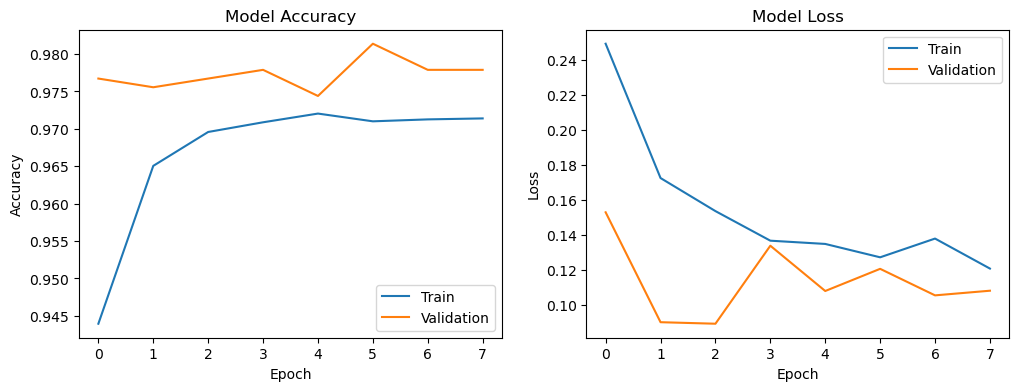

In [2]:
#small model training and evaluation
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Path to the HDF5 file
hdf5_file_path = 'subset_dataset.h5'

# Load the data
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, {y_val.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with a smaller batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=2,  # Further reduced batch size
    callbacks=[early_stopping, model_checkpoint]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [3]:
# as the memory issue solved, model with not reduced size. 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Dropout, Reshape, Multiply

# Define the FCA block
# FCA is used to emphasize important channels and suppress less important ones.
def FCA_block(inputs, reduction_ratio=16):
    # Get the number of channels in the input tensor
    channel_axis = -1
    channels = inputs.shape[channel_axis]

    # Apply Global Average Pooling to the input tensor to get a channel-wise summary
    x = GlobalAveragePooling2D()(inputs)

    # Reduce the number of channels by a factor of `reduction_ratio` using a fully connected layer
    x = Dense(channels // reduction_ratio, activation='relu')(x)

    # Restore the number of channels to the original using another fully connected layer
    x = Dense(channels, activation='sigmoid')(x)

    # Reshape the output to match the input tensor's shape but with single spatial dimensions
    x = Reshape((1, 1, channels))(x)

    # Multiply the input tensor with the output of the fully connected layers
    # This step modulates the importance of each channel
    outputs = Multiply()([inputs, x])
    return outputs

# Define a residual block with FCA
# This block uses residual connections to improve gradient flow and an FCA block for channel attention.
def residual_block(inputs, filters, kernel_size=3, strides=1, use_fca=True):
    # Apply the first convolutional layer
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)

    # Apply batch normalization to stabilize the training process
    x = BatchNormalization()(x)

    # Apply the LeakyReLU activation function for non-linearity
    x = LeakyReLU(alpha=0.2)(x)

    # Optionally apply the FCA block
    if use_fca:
        x = FCA_block(x)

    # Apply the second convolutional layer
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Create a shortcut connection that adds the input directly to the output if the dimensions match
    if strides != 1 or inputs.shape[-1] != filters:
        # If dimensions do not match, apply a convolution to the input to match the output dimensions
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
    else:
        # Otherwise, the shortcut is just the input
        shortcut = inputs

    # Add the shortcut to the output of the second convolutional layer
    x = Add()([x, shortcut])
    return x

# Define the full model
def build_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)  # Define the input layer with the given shape

    # Initial convolutional layer to extract basic features
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)  # Apply max pooling to reduce spatial dimensions
    x = BatchNormalization()(x)  # Normalize the activations

    # Add residual blocks with increasing complexity and spatial downsampling
    x = residual_block(x, 64)  # First block, keeps the spatial dimensions
    x = residual_block(x, 64)  # Second block, keeps the spatial dimensions
    x = residual_block(x, 128, strides=2)  # Third block, reduces the spatial dimensions by half
    x = residual_block(x, 128)  # Fourth block, keeps the spatial dimensions
    x = residual_block(x, 256, strides=2)  # Fifth block, reduces the spatial dimensions by half
    x = residual_block(x, 256)  # Sixth block, keeps the spatial dimensions
    x = residual_block(x, 512, strides=2)  # Seventh block, reduces the spatial dimensions by half
    x = residual_block(x, 512)  # Eighth block, keeps the spatial dimensions

    # Apply global average pooling to reduce each feature map to a single value
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers for final classification
    x = Dense(512, activation='relu')(x)  # Dense layer with 512 units and ReLU activation
    x = Dropout(0.5)(x)  # Dropout for regularization
    x = Dense(64, activation='relu')(x)  # Dense layer with 64 units and ReLU activation
    x = Dropout(0.5)(x)  # Dropout for regularization
    x = Dense(16, activation='relu')(x)  # Dense layer with 16 units and ReLU activation
    x = Dropout(0.5)(x)  # Dropout for regularization

    # Final output layer with softmax activation for classification
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs, outputs)
    return model

# Build and compile the model
input_shape = (128, 128, 3)  # Define the input shape of the images
num_classes = 5  # Define the number of output classes
model = build_model(input_shape, num_classes)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 64, 64, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)           0         ['conv2d_15[0][0]']           
 g2D)                                                                                             
                                                                                                  
 batch_normalization_13 (Ba  (None, 32, 32, 64)           256       ['max_pooling2d_1[0][0]'

Training data shape: (7724, 128, 128, 3), (7724,)
Validation data shape: (859, 128, 128, 3), (859,)
Testing data shape: (2146, 128, 128, 3), (2146,)
Epoch 1/20
483/483 [==============================] - ETA: 0s - loss: 0.5726 - accuracy: 0.8282

/home/researchgroup/miniconda3/envs/newtest/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


483/483 [==============================] - 34s 45ms/step - loss: 0.5726 - accuracy: 0.8282 - val_loss: 0.1230 - val_accuracy: 0.9744
Epoch 2/20
483/483 [==============================] - 19s 39ms/step - loss: 0.2843 - accuracy: 0.9385 - val_loss: 0.1398 - val_accuracy: 0.9674
Epoch 3/20
483/483 [==============================] - 18s 38ms/step - loss: 0.2431 - accuracy: 0.9526 - val_loss: 0.1240 - val_accuracy: 0.9767
Epoch 4/20
483/483 [==============================] - 19s 39ms/step - loss: 0.2147 - accuracy: 0.9569 - val_loss: 0.1211 - val_accuracy: 0.9732
Epoch 5/20
483/483 [==============================] - 18s 38ms/step - loss: 0.2073 - accuracy: 0.9595 - val_loss: 0.1233 - val_accuracy: 0.9767
Epoch 6/20
483/483 [==============================] - 19s 39ms/step - loss: 0.1769 - accuracy: 0.9618 - val_loss: 0.1115 - val_accuracy: 0.9767
Epoch 7/20
483/483 [==============================] - 18s 38ms/step - loss: 0.1494 - accuracy: 0.9647 - val_loss: 0.1449 - val_accuracy: 0.9779
Epo

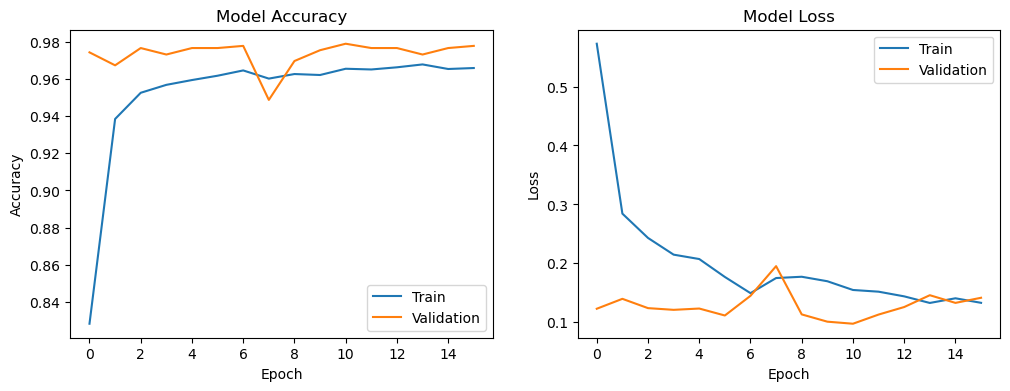

In [4]:
#updated model training and evaluation (This model is created according to the paper)
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Path to the HDF5 file
hdf5_file_path = 'subset_dataset.h5'

# Load the data
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, {y_val.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with a batch size of 16
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Keep epochs at 20
    batch_size=16,  # Increase batch size to 16
    callbacks=[early_stopping, model_checkpoint]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [3]:
import h5py
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Save training data
with h5py.File('train_dataset.h5', 'w') as hdf5_file:
    hdf5_file.create_dataset('images', data=X_train, compression='gzip')
    hdf5_file.create_dataset('labels', data=y_train, compression='gzip')

# Save validation data
with h5py.File('val_dataset.h5', 'w') as hdf5_file:
    hdf5_file.create_dataset('images', data=X_val, compression='gzip')
    hdf5_file.create_dataset('labels', data=y_val, compression='gzip')

# Save test data
with h5py.File('test_dataset.h5', 'w') as hdf5_file:
    hdf5_file.create_dataset('images', data=X_test, compression='gzip')
    hdf5_file.create_dataset('labels', data=y_test, compression='gzip')

NameError: name 'images' is not defined